# Khushboo Solanki
# Task-6 Prediction using Decision Tree Algorithm
<font size = "4">In this, I will be predicting the species of iris flower using the given dataset.</br></br> For this, I will be using DecisionTreeClassifier Algorithm from sklearn.tree
</font>

In [33]:
#importing the necessary libraries to complete the given task
import pandas as pd
import numpy as np

In [34]:
#importing the dataset for the given task
path = "iris.csv"
dataSet = pd.read_csv(path)
dataSet.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Preparing the Data

In [61]:
X = dataSet.iloc[:,1:-1]
Y = dataSet.iloc[:,-1]

<font size = "4">Here, I am using LabelEncoder() as Species are categorical data, whereas we need numerical data for implementing decision Tree Classifier Algorithm</font>

In [62]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'species'.
dataSet['Species']= label_encoder.fit_transform(dataSet['Species']) 


# Splitting the Data

In [63]:
#importing train_test_split from slklearn.model_selection
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2, random_state = 0 )

# Creating and Training the Model

In [64]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion="entropy")
dtc.fit(X_train,Y_train)
print("Model Trained")

Model Trained


# Predicting the test_set 

In [65]:
predTree = dtc.predict(X_test)

# Comparing the Actual and Predicted Species

In [66]:
df = pd.DataFrame({'Actual Species':Y_test, 'Predicted Species': predTree})
df.head(10)

,Actual Species,Predicted Species
114,2,2
62,1,1
33,0,0
107,2,2
7,0,0
100,2,2
40,0,0
86,1,1
76,1,1
71,1,1


# Model Evaluation

In [67]:
from sklearn import metrics
print("The accuracy is:", metrics.accuracy_score(Y_test,predTree))

The accuracy is: 1.0


# Visualization

In [68]:
from six import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn.tree import export_graphviz
from sklearn import tree
%matplotlib inline


In [69]:
x = dataSet.columns
features_name = x[1:5]

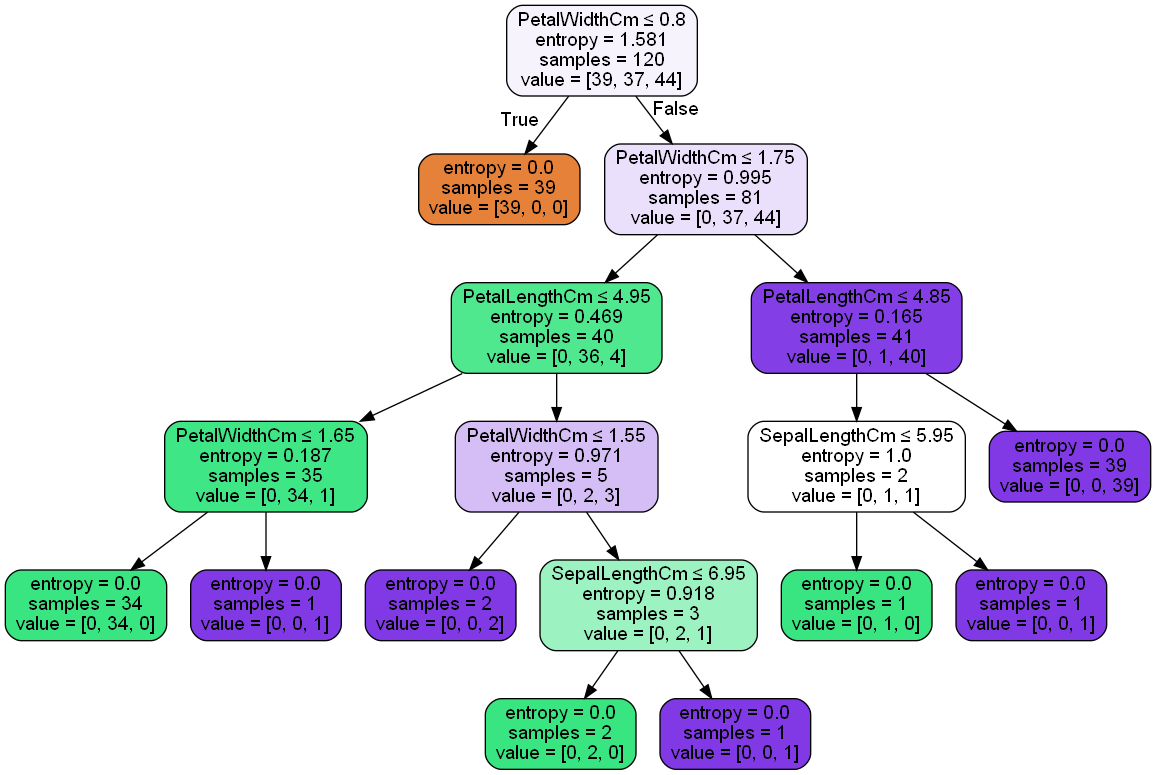

In [70]:
from six import StringIO  
from IPython.display import Image  
from sklearn.tree import export_graphviz
import pydotplus

# Visualize the graph
dot_data = StringIO()
export_graphviz(dtc, out_file=dot_data, feature_names=features_name,  
                filled=True, rounded=True,
                special_characters=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())